In [53]:
# Imports
import csv
import time
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [3]:
# Read dataset
path = 'dataset/flights.csv'
reader = csv.reader(open(path, 'rt'), delimiter=',')
dataset = []
header = next(reader)
to_remove_fields = ['YEAR', 'TAXI_OUT', 'TAIL_NUMBER', 'TAXI_OUT', 'WHEELS_OFF', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 
                    'DIVERTED','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY']
for line in reader:
    d = dict(zip(header, line))
    for field in to_remove_fields:
        d.pop(field, None)
    dataset.append(d)

In [4]:
# 5819079
len(dataset), dataset[1]

(5819079,
 {'YEAR': '2015',
  'MONTH': '1',
  'DAY': '1',
  'DAY_OF_WEEK': '4',
  'AIRLINE': 'AA',
  'FLIGHT_NUMBER': '2336',
  'ORIGIN_AIRPORT': 'LAX',
  'DESTINATION_AIRPORT': 'PBI',
  'SCHEDULED_DEPARTURE': '0010',
  'DEPARTURE_TIME': '0002',
  'DEPARTURE_DELAY': '-8',
  'SCHEDULED_TIME': '280',
  'ELAPSED_TIME': '279',
  'DISTANCE': '2330',
  'SCHEDULED_ARRIVAL': '0750',
  'ARRIVAL_TIME': '0741',
  'ARRIVAL_DELAY': '-9',
  'CANCELLED': '0',
  'CANCELLATION_REASON': '',
  'WEATHER_DELAY': ''})

# Exploration

## Airport Locations

In [24]:
airport_count = defaultdict(int)
for d in dataset:
    airport_count[d['ORIGIN_AIRPORT']] += 1

In [25]:
airport_count

defaultdict(int,
            {'ANC': 16005,
             'LAX': 194673,
             'SFO': 148008,
             'SEA': 110899,
             'LAS': 133181,
             'DEN': 196055,
             'SLC': 97210,
             'PDX': 47085,
             'FAI': 2183,
             'MSP': 112117,
             'PHX': 146815,
             'SJU': 24656,
             'PBG': 281,
             'IAG': 322,
             'PSE': 749,
             'BQN': 1343,
             'ORD': 285884,
             'GEG': 9505,
             'HNL': 43172,
             'ONT': 17978,
             'MCO': 110982,
             'BOS': 107847,
             'HIB': 898,
             'ABR': 671,
             'MAF': 7527,
             'DFW': 239551,
             'MKE': 29825,
             'IAH': 146622,
             'BNA': 47580,
             'BRO': 2362,
             'VPS': 4868,
             'BOI': 11655,
             'BJI': 667,
             'SGF': 6236,
             'PHL': 66021,
             'SBN': 4454,
             'RDD':

In [31]:
# Convert to time
for d in dataset:
    d['SCHEDULED_DEPARTURE'] = time.strptime(d['SCHEDULED_DEPARTURE'], "%H%M")
    d['DEPARTURE_TIME'] = time.strptime(d['DEPARTURE_TIME'], "%H%M")
    d['SCHEDULED_ARRIVAL'] = time.strptime(d['SCHEDULED_ARRIVAL'], "%H%M")
    d['ARRIVAL_TIME'] = time.strptime(d['ARRIVAL_TIME'], "%H%M")

KeyboardInterrupt: 

In [5]:
dataset[0]

{'YEAR': '2015',
 'MONTH': '1',
 'DAY': '1',
 'DAY_OF_WEEK': '4',
 'AIRLINE': 'AS',
 'FLIGHT_NUMBER': '98',
 'ORIGIN_AIRPORT': 'ANC',
 'DESTINATION_AIRPORT': 'SEA',
 'SCHEDULED_DEPARTURE': '0005',
 'DEPARTURE_TIME': '2354',
 'DEPARTURE_DELAY': '-11',
 'SCHEDULED_TIME': '205',
 'ELAPSED_TIME': '194',
 'DISTANCE': '1448',
 'SCHEDULED_ARRIVAL': '0430',
 'ARRIVAL_TIME': '0408',
 'ARRIVAL_DELAY': '-22',
 'CANCELLED': '0',
 'CANCELLATION_REASON': '',
 'WEATHER_DELAY': ''}

## Basic Statistics

### Num of Flights Per Airline Company

In [6]:
num_flights_per_airline = defaultdict(int)
for d in dataset:
    num_flights_per_airline[d['AIRLINE']] += 1

In [7]:
num_flights_per_airline

defaultdict(int,
            {'AS': 172521,
             'AA': 725984,
             'US': 198715,
             'DL': 875881,
             'NK': 117379,
             'UA': 515723,
             'HA': 76272,
             'B6': 267048,
             'OO': 588353,
             'EV': 571977,
             'MQ': 294632,
             'F9': 90836,
             'WN': 1261855,
             'VX': 61903})

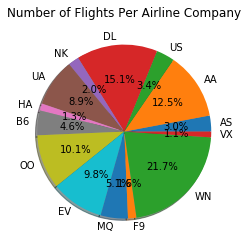

In [47]:
x_vals = []
y_vals = []
total_flights = sum(num_flights_per_airline.values())
for d in num_flights_per_airline:
    x_vals.append(d)
    y_vals.append(num_flights_per_airline[d]/total_flights)
plt.pie(y_vals, labels=x_vals, shadow=True, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Number of Flights Per Airline Company')
plt.show()

### Delays Distribution Per Airline

In [28]:
# Remove cancelled flights and get the mean delay time for each airline
delays_per_airline = defaultdict(list)
for d in dataset:
    if d['DEPARTURE_DELAY']:
        delays_per_airline[d['AIRLINE']].append(int(d['DEPARTURE_DELAY']))

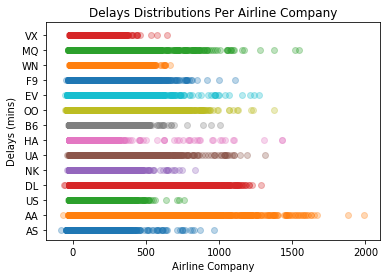

In [93]:
for d in delays_per_airline:
    y = delays_per_airline[d]
    plt.scatter(y, [d] * len(y), alpha=0.3)
plt.xlabel('Airline Company')
plt.ylabel('Delays (mins)')
plt.title('Delays Distributions Per Airline Company')
plt.show()
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)

### Delays Max, Min, Mean Per Airline

In [29]:
x_vals = []
y_min_delay = []
y_max_delay = []
y_mean_delay = []
for d in delays_per_airline:
    x_vals.append(d)
    y_min_delay.append(min(delays_per_airline[d]))
    y_max_delay.append(max(delays_per_airline[d]))
    y_mean_delay.append(sum(delays_per_airline[d]) / len(delays_per_airline[d]))

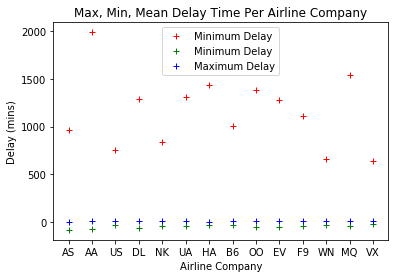

In [94]:
plt.plot(x_vals, y_max_delay, 'r+', label='Minimum Delay')
plt.plot(x_vals, y_min_delay, 'g+', label='Minimum Delay')
plt.plot(x_vals, y_mean_delay, 'b+', label='Maximum Delay')
plt.xlabel('Airline Company')
plt.ylabel('Delay (mins)')
plt.title('Max, Min, Mean Delay Time Per Airline Company')
plt.legend()
plt.show()

### Mean Delays Per Airline Company

In [23]:
mean_delay_per_airline = {}
for d in delays_per_airline:
    mean_delay_per_airline[d] = sum(delays_per_airline[d])/len(delays_per_airline[d])

In [24]:
mean_delay_per_airline

{'AS': 1.7858007096736666,
 'AA': 8.900856346719806,
 'US': 6.141136917746696,
 'DL': 7.36925417661782,
 'NK': 15.944765880783688,
 'UA': 14.435441010805953,
 'HA': 0.48571315965790407,
 'B6': 11.5143526744102,
 'OO': 7.801103808415331,
 'EV': 8.71593449776958,
 'F9': 13.350858345331709,
 'WN': 10.581986295158847,
 'MQ': 10.125188203309524,
 'VX': 9.022595096521952}

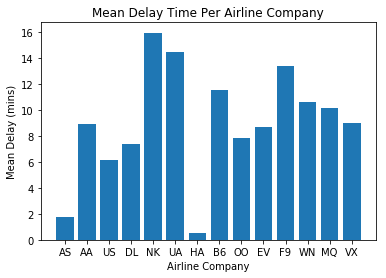

In [25]:
x_vals = []
y_vals = []
for d in mean_delay_per_airline:
    x_vals.append(d)
    y_vals.append(mean_delay_per_airline[d])
plt.bar(x_vals, y_vals)
plt.xlabel('Airline Company')
plt.ylabel('Mean Delay (mins)')
plt.title('Mean Delay Time Per Airline Company')
plt.show()

### Delays Count Categorized

In [76]:
len(ind), len(y_ontime)

(13, 14)

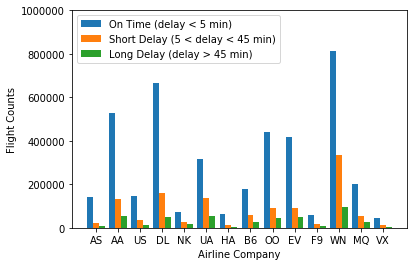

In [92]:
index = 1
width = 0.27
x_vals = []
y_ontime = []
y_short_delay = []
y_long_delay = []
for d in delays_per_airline:
    x_vals.append(d)
    y_ontime.append(0)
    y_short_delay.append(0)
    y_long_delay.append(0)
    for y in delays_per_airline[d]:
        if y < 5: y_ontime[index-1] += 1
        elif y < 45: y_short_delay[index-1] += 1
        else: y_long_delay[index-1] += 1
    index += 1
ind = np.arange(1, 15, 1)
plt.bar(ind-width, y_ontime, width, color='tab:blue', label='On Time (delay < 5 min)')
plt.bar(ind, y_short_delay, width, color='tab:orange', label='Short Delay (5 < delay < 45 min)')
plt.bar(ind+width, y_long_delay, width, color='tab:green', label='Long Delay (delay > 45 min)')
plt.xticks(ind, x_vals)
plt.ylim(0, 1e6)
plt.legend(loc='upper left')
plt.xlabel('Airline Company')
plt.ylabel('Flight Counts')
plt.show()